#Omar Medhat


# Imports

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression

In [5]:
df = pd.read_csv("/content/first inten project.csv")

#Data Preprocessing

In [6]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [7]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   booking_id                36285 non-null  object 
 1   number_of_adults          36285 non-null  int64  
 2   number_of_children        36285 non-null  int64  
 3   number_of_weekend_nights  36285 non-null  int64  
 4   number_of_week_nights     36285 non-null  int64  
 5   type_of_meal              36285 non-null  object 
 6   car_parking_space         36285 non-null  int64  
 7   room_type                 36285 non-null  object 
 8   lead_time                 36285 non-null  int64  
 9   market_segment_type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  p-c                       36285 non-null  int64  
 12  p-not-c                   36285 non-null  int64  
 13  average_price             36285 non-null  float64
 14  specia

In [10]:
df.head()

,booking_id,number_of_adults,number_of_children,number_of_weekend_nights,number_of_week_nights,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,p-c,p-not-c,average_price,special_requests,date_of_reservation,booking_status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


#Outliers

## Before Handling Outliers

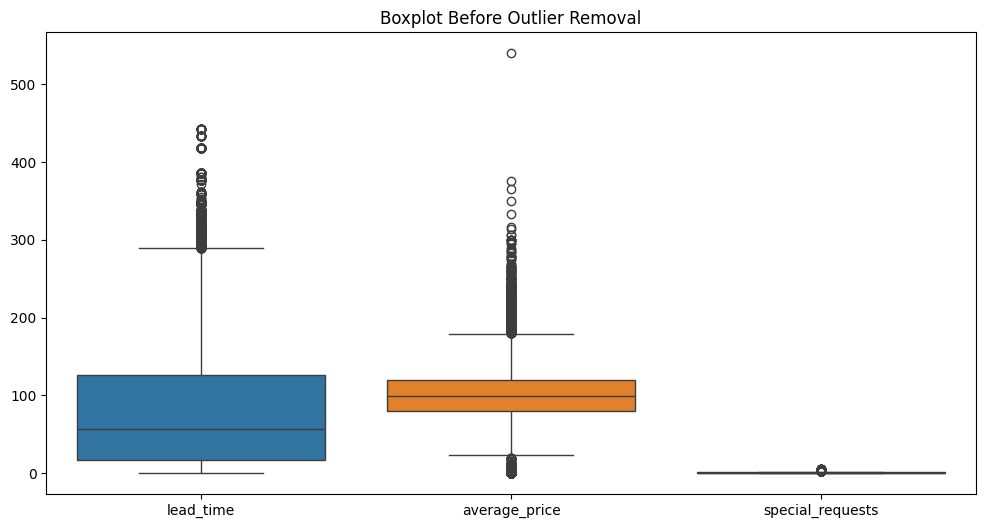

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['lead_time', 'average_price', 'special_requests']])
plt.title("Boxplot Before Outlier Removal")
plt.show()

## Handling Using IQR Method

In [12]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [13]:
outlier_cols = ['lead_time', 'average_price', 'special_requests']
for col in outlier_cols:
    df = remove_outliers_iqr(df, col)

## After Handling Outliers


Dataset shape after outlier removal: (32669, 17)


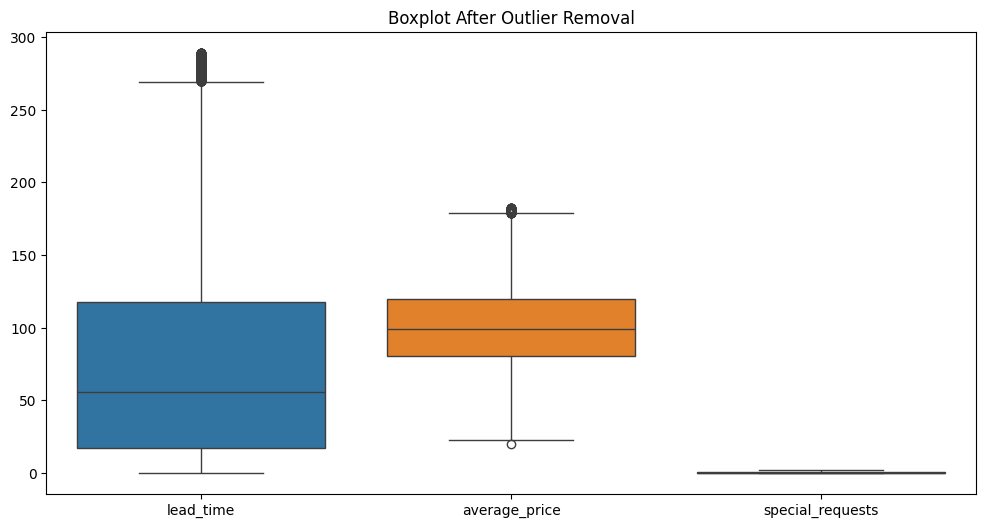

In [14]:
print(f"Dataset shape after outlier removal: {df.shape}")

# Visualizing Outliers after removal
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['lead_time', 'average_price', 'special_requests']])
plt.title("Boxplot After Outlier Removal")
plt.show()

# Feature Engineering

In [16]:
# Encode target variable
df['booking_status'] = LabelEncoder().fit_transform(df['booking_status'])


In [17]:
# Encode categorical variables
categorical_cols = ['type_of_meal', 'room_type', 'market_segment_type']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [18]:
# Feature Selection using Random Forest Importance
X = df.drop(columns=['booking_status', 'booking_id', 'date_of_reservation'])
y = df['booking_status']

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

RandomForestClassifier(random_state=42)

In [19]:
# Get feature importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

In [20]:
# Display top features
print("Top Important Features:")
print(feature_importances.head())

Top Important Features:
                     Feature  Importance
5                  lead_time    0.417111
9              average_price    0.246429
10          special_requests    0.097278
3      number_of_week_nights    0.064849
2   number_of_weekend_nights    0.042554


#Data Transformation

In [23]:
categorical_cols = ['type_of_meal', 'room_type', 'market_segment_type']
existing_categorical_cols = [col for col in categorical_cols if col in df.columns]

if existing_categorical_cols:
    df = pd.get_dummies(df, columns=existing_categorical_cols, drop_first=True)
    print("Categorical variables successfully transformed.")
else:
    print("No categorical columns found for transformation.")


No categorical columns found for transformation.


In [24]:
# Display transformed dataset info
print("Dataset after categorical transformation:")
df.info()


Dataset after categorical transformation:
<class 'pandas.core.frame.DataFrame'>
Index: 32669 entries, 0 to 36283
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   booking_id                         32669 non-null  object 
 1   number_of_adults                   32669 non-null  int64  
 2   number_of_children                 32669 non-null  int64  
 3   number_of_weekend_nights           32669 non-null  int64  
 4   number_of_week_nights              32669 non-null  int64  
 5   car_parking_space                  32669 non-null  int64  
 6   lead_time                          32669 non-null  int64  
 7   repeated                           32669 non-null  int64  
 8   p-c                                32669 non-null  int64  
 9   p-not-c                            32669 non-null  int64  
 10  average_price                      32669 non-null  float64
 11  special_requests 

# Train Test Split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [27]:
results = {}

# Modeling And Accuracy

##KNN

In [28]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
results['KNN'] = {'Accuracy': accuracy_score(y_test, y_pred_knn), 'F1 Score': f1_score(y_test, y_pred_knn)}


In [29]:
print("KNN Results:")
print(f"Accuracy: {results['KNN']['Accuracy']}")
print(f"F1 Score: {results['KNN']['F1 Score']}")

KNN Results:
Accuracy: 0.8062442607897153
F1 Score: 0.861639344262295


## Logistic Regression

In [30]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
results['Logistic Regression'] = {'Accuracy': accuracy_score(y_test, y_pred_log_reg), 'F1 Score': f1_score(y_test, y_pred_log_reg)}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
print("Logistic Regression Results:")
print(f"Accuracy: {results['Logistic Regression']['Accuracy']}")
print(f"F1 Score: {results['Logistic Regression']['F1 Score']}")

Logistic Regression Results:
Accuracy: 0.793082338536884
F1 Score: 0.8537113178965592


##Polynomial Regression

In [33]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_poly).round()
# Changed lines below to set average='weighted'
results['Polynomial Regression'] = {'Accuracy': accuracy_score(y_test, y_pred_poly),'F1 Score': f1_score(y_test, y_pred_poly, average='weighted')}

In [34]:
print("Polynomial Regression Results:")
print(f"Accuracy: {results['Polynomial Regression']['Accuracy']}")
print(f"F1 Score: {results['Polynomial Regression']['F1 Score']}")

Polynomial Regression Results:
Accuracy: 0.810376492194674
F1 Score: 0.8035661691468899


## Linear Regrssion

In [36]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin_reg = lin_reg.predict(X_test).round()
# Changed line below to set average='weighted'
results['Linear Regression'] = {'Accuracy': accuracy_score(y_test, y_pred_lin_reg), 'F1 Score': f1_score(y_test, y_pred_lin_reg, average='weighted')}

In [37]:
print("Linear Regression Results:")
print(f"Accuracy: {results['Linear Regression']['Accuracy']}")
print(f"F1 Score: {results['Linear Regression']['F1 Score']}")


Linear Regression Results:
Accuracy: 0.7946127946127947
F1 Score: 0.7871063705452409


#Comparison

In [39]:
# Convert results to DataFrame
results_df = pd.DataFrame(results).T

<Figure size 1000x500 with 0 Axes>

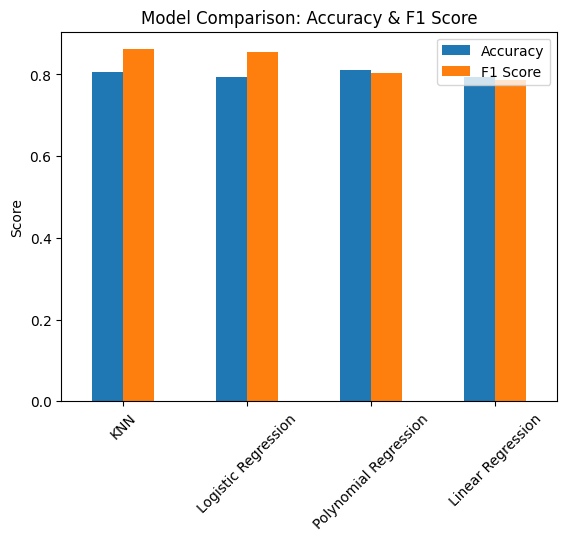

In [40]:
# Plot comparison
plt.figure(figsize=(10, 5))
results_df.plot(kind='bar', rot=45)
plt.title("Model Comparison: Accuracy & F1 Score")
plt.ylabel("Score")
plt.show()